In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [2]:
def read_data(path_to_csv):
    chips_df = pd.read_csv(path_to_csv)
    chips_df['class'] = chips_df['class'].map({'P': 1, 'N': -1})

    X = chips_df.drop('class', axis=1)
    y = chips_df['class']
    return X, y

In [3]:
def scatter(X, y, classifier):
    X_x, X_y = X.to_numpy()[:, 0], X.to_numpy()[:, 1]

    points_count = 200
    background_x, background_y = np.meshgrid(
        np.linspace(X_x.min(), X_x.max(), points_count),
        np.linspace(X_y.min(), X_y.max(), points_count)
    )
    background = np.array(list(zip(background_x.ravel(), background_y.ravel())))
    background_pred = classifier.predict(background)

    plt.scatter(background[:, 0], background[:, 1], c=['green' if c == 1 else 'red' for c in background_pred], s=1,
                alpha=0.2)

    plt.scatter(X_x, X_y, c=['green' if c == 1 else 'red' for c in y], s=30)
    plt.show()

In [4]:
def grid_search_cv(estimator, grid_params, X, y, scoring, verbose=False):
    params_list = list(grid_params.keys())
    best_score = 0.0
    best_params = {}
    if verbose:
        print(params_list)

    for params in (dict(zip(grid_params.keys(), values)) for values in product(*grid_params.values())):
        estimator.set_params(**params)
        scores = cross_val_score(estimator, X, y, scoring=make_scorer(scoring), cv=5)
        score = np.mean(scores)

        if verbose:
            print(tuple(params.values()), score)

        if score > best_score:
            best_score = score
            for p_name in params_list:
                best_params[p_name] = params[p_name]

    return estimator.set_params(**best_params).fit(X, y), best_params, best_score

In [5]:
X, y = read_data('./dataset/chips.csv')

{'kernel': 'linear', 'gamma': 0.1, 'C': 3} 0.36548188653451813


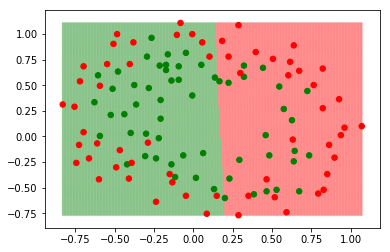

In [6]:
parameters = {
    'kernel': ['linear'],
    'gamma': np.arange(0.1, 1.0, 0.1),
    'C': [1, 3, 5, 10, 30, 50, 100, 200, 500]
}

clf, best_params, best_score = grid_search_cv(SVC(gamma='scale'), parameters, X, y, scoring=f1_score, verbose=False)
print(best_params, best_score)
scatter(X, y, clf)

{'kernel': 'poly', 'degree': 6, 'C': 5} 0.7808058608058609


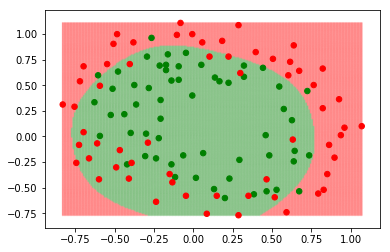

In [7]:
parameters = {
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5, 6],
    'C': [1, 3, 5, 10, 30, 50, 100, 200, 500]
}

clf, best_params, best_score = grid_search_cv(SVC(gamma='scale'), parameters, X, y, scoring=f1_score, verbose=False)
print(best_params, best_score)
scatter(X, y, clf)

{'kernel': 'rbf', 'gamma': 0.5, 'C': 50} 0.7517560700169396


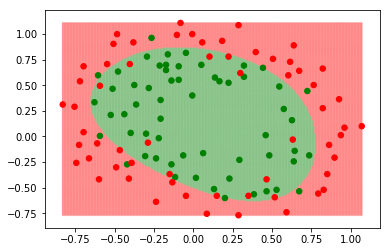

In [8]:
parameters = {
    'kernel': ['rbf'],
    'gamma': np.arange(0.1, 1.0, 0.1),
    'C': [1, 3, 5, 10, 30, 50, 100, 200, 500]
}

clf, best_params, best_score = grid_search_cv(SVC(gamma='scale'), parameters, X, y, scoring=f1_score, verbose=False)
print(best_params, best_score)
scatter(X, y, clf)

In [9]:
X, y = read_data('./dataset/geyser.csv')

{'kernel': 'linear', 'gamma': 0.1, 'C': 5} 0.8745601173020529


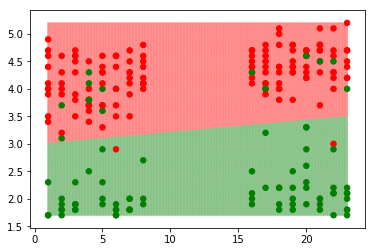

In [10]:
parameters = {
    'kernel': ['linear'],
    'gamma': np.arange(0.1, 1.0, 0.1),
    'C': [1, 5, 10, 50, 100, 200, 500]
}

clf, best_params, best_score = grid_search_cv(SVC(gamma='scale'), parameters, X, y, scoring=f1_score, verbose=False)
print(best_params, best_score)
scatter(X, y, clf)

{'kernel': 'poly', 'degree': 2, 'C': 500} 0.8755990783410139


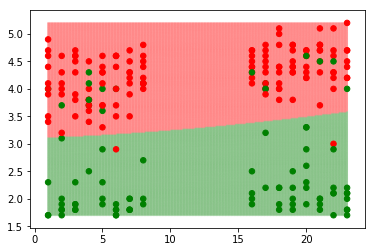

In [11]:
parameters = {
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5],
    'C': [1, 5, 10, 50, 100, 500]
}

clf, best_params, best_score = grid_search_cv(SVC(gamma='scale'), parameters, X, y, scoring=f1_score, verbose=False)
print(best_params, best_score)
scatter(X, y, clf)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.5} 0.8005529953917051


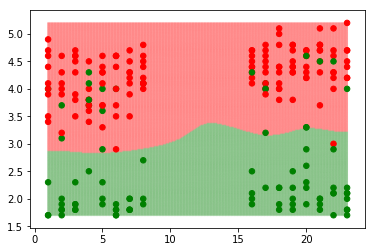

In [15]:
parameters = {
    'kernel': ['rbf'],
    'gamma': np.arange(0.1, 1.0, 0.1),
    'C': [0.5, 1, 3, 5, 10, 50, 100, 500]
}

clf, best_params, best_score = grid_search_cv(SVC(gamma='scale'), parameters, X, y, scoring=f1_score, verbose=False)
print(best_params, best_score)
scatter(X, y, clf)